<h3> Import Libraries


In [112]:
import pandas as pd
import numpy as np
import seaborn as sns

In [113]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('seaborn: {}'.format(sns.__version__))



pandas: 0.23.0
numpy: 1.14.3
seaborn: 0.8.1


<h3>Import Dataset

In [114]:
dataset=pd.read_csv('E:\\ML_Data\\titanic_train.csv')

In [115]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
dataset.shape

(891, 12)

<h3>Checking Null Values

In [117]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3>Using Heatmap to Visualize Null Values

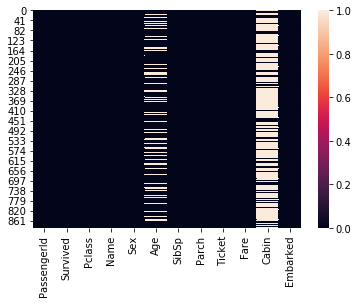

In [118]:
sns.heatmap(dataset.isnull())

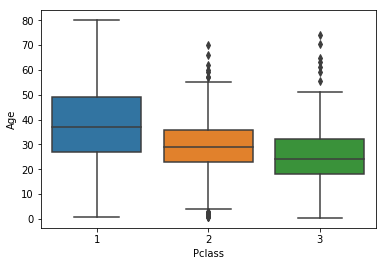

In [119]:
sns.boxplot(x='Pclass',y='Age',data=dataset)

<h3>On the bases of "Pclass" Fill "Age" values 

In [120]:
def imputr_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 27
        else:
            return 24
    else:
        return Age

In [121]:
dataset['Age']=dataset[['Age','Pclass']].apply(imputr_age,axis=1)

<h3>Drop Unwanted columns

In [122]:
dataset.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [123]:
dataset.dropna(inplace=True)

<h3>Seprate Independent and Dependentent Columns from Dataset

In [124]:
X=dataset.drop('Survived',axis=1)
X=X.iloc[:,:].values
y=dataset.iloc[:,1].values

<h3>Data Pre-processing

In [125]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder1=LabelEncoder()
X[:,2]=labelencoder1.fit_transform(X[:,2])
X[:,7]=labelencoder1.fit_transform(X[:,7])
onehoencoder=OneHotEncoder(categorical_features=[7])
X=onehoencoder.fit_transform(X).toarray()
X=X[:,1:]

In [126]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


<h3>Fitting Logistic Regression to the Training set

In [128]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h3>Predicting the Test set results

In [129]:

y_pred = classifier.predict(X_test)


<h3>Model Evalution

In [130]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[149  14]
 [ 33  71]]


In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.91      0.86       163
          1       0.84      0.68      0.75       104

avg / total       0.83      0.82      0.82       267



<h3>Actual vs Predict Values

In [43]:
predicted_Values=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
print(predicted_Values)

     Actual  Pred
0         0     0
1         0     0
2         1     1
3         1     1
4         0     0
5         0     0
6         0     0
7         0     0
8         0     0
9         1     1
10        1     1
11        1     1
12        0     0
13        1     1
14        0     0
15        0     0
16        1     1
17        1     1
18        1     1
19        0     0
20        0     0
21        0     0
22        0     0
23        0     0
24        0     0
25        1     0
26        0     1
27        0     1
28        0     0
29        0     0
..      ...   ...
237       0     0
238       1     1
239       0     0
240       0     0
241       0     0
242       1     0
243       1     0
244       1     1
245       0     0
246       0     0
247       1     0
248       0     1
249       1     1
250       0     0
251       1     1
252       0     0
253       0     0
254       0     0
255       0     0
256       0     0
257       1     0
258       0     0
259       1     1
260       